# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [3]:
print("Most of the campaign communication are done through calls either by 'telephone' or 'cellular' which is a telemarketing campaign.")

Most of the campaign communication are done through calls either by 'telephone' or 'cellular' which is a telemarketing campaign.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
df['default'] = df['default'].map({'yes': 1, 'no': 0, 'unknown': 9})

df['housing'] = df['housing'].map({'yes': 1, 'no': 0, 'unknown': 9})

df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unknown': 9})


In [13]:
df['loan'] = df['loan'].astype(int)
df['housing'] = df['housing'].astype(int)
df['default'] = df['default'].astype(int)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,9,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
df_tel = df.loc[(df['contact'] == 'telephone')]

df_tel.head()
num_rows, num_columns = df_tel.shape
column_names = list(df_tel.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")

Number of rows: 15044
Number of columns: 21
Column names: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
print("The business objective is to find the models which improves the efficiency & effectiveness of the telemarketing campaigns,\nalso which is accurate in predicting when the customer will subscribe to the term deposit.")

The business objective is to find the models which improves the efficiency & effectiveness of the telemarketing campaigns,
also which is accurate in predicting when the customer will subscribe to the term deposit.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [21]:
# Bank Client Data
bank_info_features = ['age','job','marital','education','default','housing','loan']

# Desired target - has the client subscribed a term deposit?
target = 'y'

customer_df = df_tel[bank_info_features+[target]]

customer_df = pd.get_dummies(customer_df, columns=['job', 'marital', 'education'], drop_first=True)

customer_df['y'] = customer_df['y'].map({'yes': 1, 'no': 0})

# Check for missing values and handle if necessary
customer_df = customer_df.dropna()  # or use imputation as appropriate

# Separate features and target
X = customer_df.drop('y', axis=1)
y = customer_df['y']

X, y

customer_df.head()

,age,default,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,57,9,0,0,0,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,37,0,1,0,0,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,40,0,0,0,0,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,56,0,0,1,0,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [23]:
customer_df.head()
num_rows, num_columns = customer_df.shape
column_names = list(customer_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")

Number of rows: 15044
Number of columns: 26
Column names: ['age', 'default', 'housing', 'loan', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown']


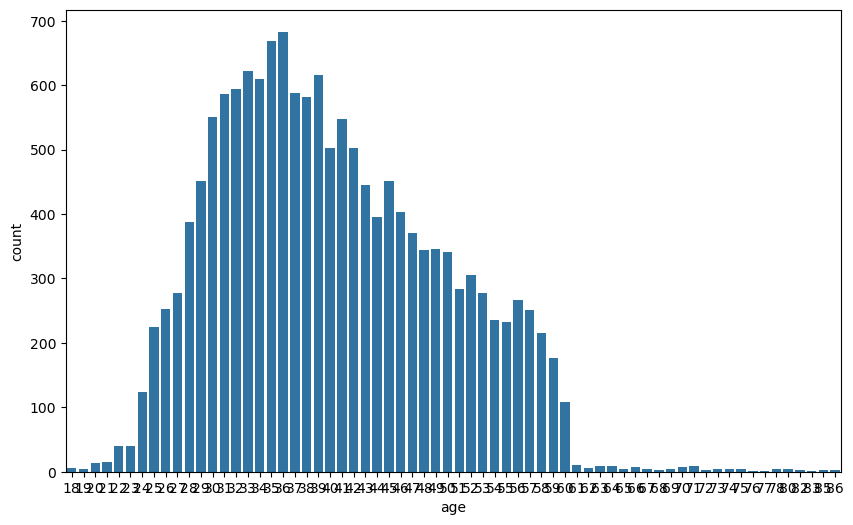

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
value_counts = customer_df['age'].value_counts().reset_index()
value_counts.columns = ['age', 'count']
sns.barplot(x='age', y='count', data=value_counts)
plt.show()
plt.savefig("images/Bar_Plot_img_01.png")

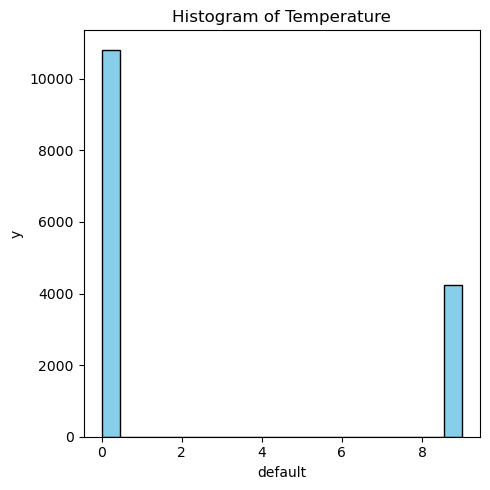

<Figure size 640x480 with 0 Axes>

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist(customer_df['default'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('default')
plt.ylabel('y')
plt.title('Histogram of Temperature')
plt.tight_layout()
plt.show()
plt.savefig("images/Histogram_Plot_img_02.png")

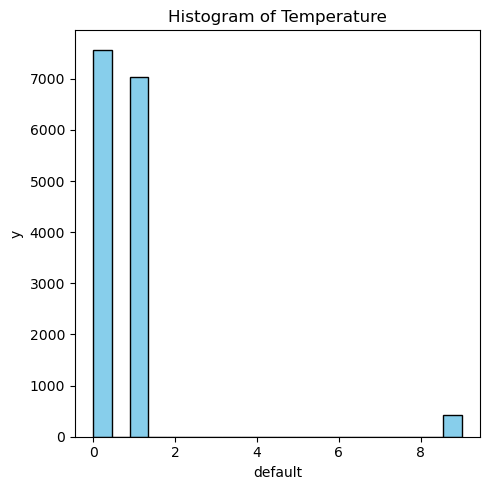

<Figure size 640x480 with 0 Axes>

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist(customer_df['housing'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('default')
plt.ylabel('y')
plt.title('Histogram of Temperature')
plt.tight_layout()
plt.show()
plt.savefig("images/Histogram_Plot_img_03.png")

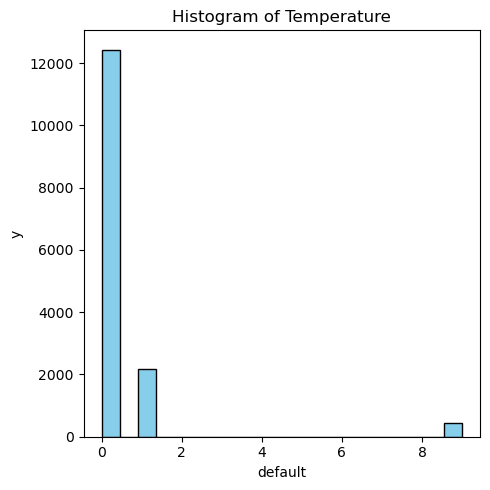

<Figure size 640x480 with 0 Axes>

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist(customer_df['loan'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('default')
plt.ylabel('y')
plt.title('Histogram of Temperature')
plt.tight_layout()
plt.show()
plt.savefig("images/Histogram_Plot_img_04.png")

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [145]:
print("As per the given data, 88.7% (36,548 customers) of bank customers are not subscribed to term deposit ")
print("which is the major class and only 11.2% (4640 customers) group of people are subscribed.")
print("So the baseline classifier which always predicts 'No' would achieve 88% accuracy on this dataset.")

As per the given data, 88.7% (36,548 customers) of bank customers are not subscribed to term deposit 
which is the major class and only 11.2% (4640 customers) group of people are subscribed.
So the baseline classifier which always predicts 'No' would achieve 88% accuracy on this dataset.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score,classification_report, roc_auc_score

# Regression model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name} CV MAE: {-cv_scores.mean():.2f}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test MAE: {mae:.2f}, R2: {r2:.2f}\n")

    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression CV MAE: 0.05
Logistic Regression Test MAE: 0.05, R2: -0.05

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2854
           1       0.00      0.00      0.00       155

    accuracy                           0.95      3009
   macro avg       0.47      0.50      0.49      3009
weighted avg       0.90      0.95      0.92      3009

ROC-AUC: 0.5617209575694555


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 9: Score the Model

What is the accuracy of your model?

In [163]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy score of logistic regression model is nearly 95%. Score looks strogner & efficient accuracy when compared to the baseline 88%.")

Accuracy: 0.9484878697241609
Accuracy score of logistic regression model is nearly 95%. Score looks strogner & efficient accuracy when compared to the baseline 88%.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [193]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []
# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    if name in ['KNN','SVM']:
        model.fit(X_train_scaled, y_train)
        # y_pred = model.predict(X_test_scaled)
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_train, train_pred)
    acc_test = accuracy_score(y_test, test_pred)

    train_time = time.time() - start_time
    
    results.append({
        "Model": name,
        "  Train Time": round(train_time, 2),
        "  Train Accuracy": round(acc_train, 4),
        "  Test Accuracy": round(acc_test, 4)
    })

# Display results
results_df = pd.DataFrame(results)
# print(results_df.to_string(index=False))
output = results_df.to_string(index=False).split('\n')
print(output[0])
print('-' * len(output[0]))
for line in output[1:]:
    print(line)

              Model    Train Time    Train Accuracy    Test Accuracy
--------------------------------------------------------------------
Logistic Regression          0.14            0.9475           0.9485
                KNN          0.42            0.9486           0.9472
      Decision Tree          0.03            0.9670           0.9219
                SVM          2.66            0.9476           0.9485


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [233]:
print("As per the provided data, the feature 'default' doesnt have great impact over subcription of the term deposit as the nubmer of ")
print("default people are 3 only. So we can ignore this column from the dataset for the analysis. If gender was there in the dataset,")
print("i dont think it will impact because term deposit subscription depends on the customer's earning and educational backgroud ")
print("primarily but not the age.")

As per the provided data, the feature 'default' doesnt have great impact over subcription of the term deposit as the nubmer of 
default people are 3 only. So we can ignore this column from the dataset for the analysis. If gender was there in the dataset,
i dont think it will impact because term deposit subscription depends on the customer's earning and educational backgroud 
primarily but not the age.


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=120),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "SVM": SVC(kernel='linear', degree=3)
}

results = []
# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    if name in ['KNN','SVM']:
        model.fit(X_train_scaled, y_train)
        # y_pred = model.predict(X_test_scaled)
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_train, train_pred)
    acc_test = accuracy_score(y_test, test_pred)

    train_time = time.time() - start_time
    
    results.append({
        "Model": name,
        "  Train Time": round(train_time, 2),
        "  Train Accuracy": round(acc_train, 4),
        "  Test Accuracy": round(acc_test, 4)
    })

# Display results
results_df = pd.DataFrame(results)
# print(results_df.to_string(index=False))
output = results_df.to_string(index=False).split('\n')
print(output[0])
print('-' * len(output[0]))
for line in output[1:]:
    print(line)

# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# param_grid = {'max_depth': range(1, 21)}
# grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# grid.fit(X_train, y_train)
# print("Best max_depth:", grid.best_params_['max_depth'])


In [231]:
print("KNN & Decision tree accuracy has been improved by fine tuning the prameters like number of neighbours and maximum depth respectively.")
print("SVM model train time and train accuracy can be improved by chaning the kernel type to eithe linear or poly with degree=3.")

KNN & Decision tree accuracy has been improved by fine tuning the prameters like number of neighbours and maximum depth respectively.
SVM model train time and train accuracy can be improved by chaning the kernel type to eithe linear or poly with degree=3


##### Questions